In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
train = pd.read_csv("train.csv", index_col = 'Id')
test  = pd.read_csv("test.csv", index_col = 'Id')

In [3]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 80)

### Exploratory Data Analysis

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


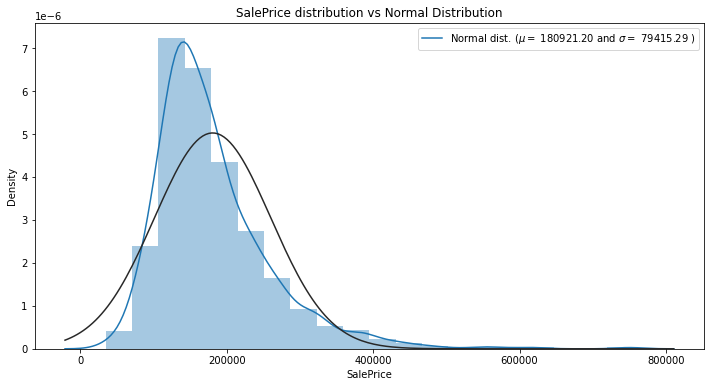

In [7]:
# Get the main parameters of the Normal Ditribution ()
from scipy.stats import norm
mu, sigma = norm.fit(train.SalePrice)

# Plot the distribution of SalePrice (look like a right-skewed distribution)
plt.figure(figsize = (12,6))
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 12)
sns.distplot(train.SalePrice, bins=20, fit = norm) 
plt.xlabel('SalePrice')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

In [8]:
# Evaluate the p-value if the data follows the normal distribution (result shows obviously not)
from scipy.stats import shapiro

print(shapiro(train.SalePrice))

### The first output is the test statistic, the second is the p-value
### If the p-Value (the second value) is larger than 0.05, a normal distribution is assumed
### The Shapiro Wilk test is better for data size < 5000

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)


<AxesSubplot:>

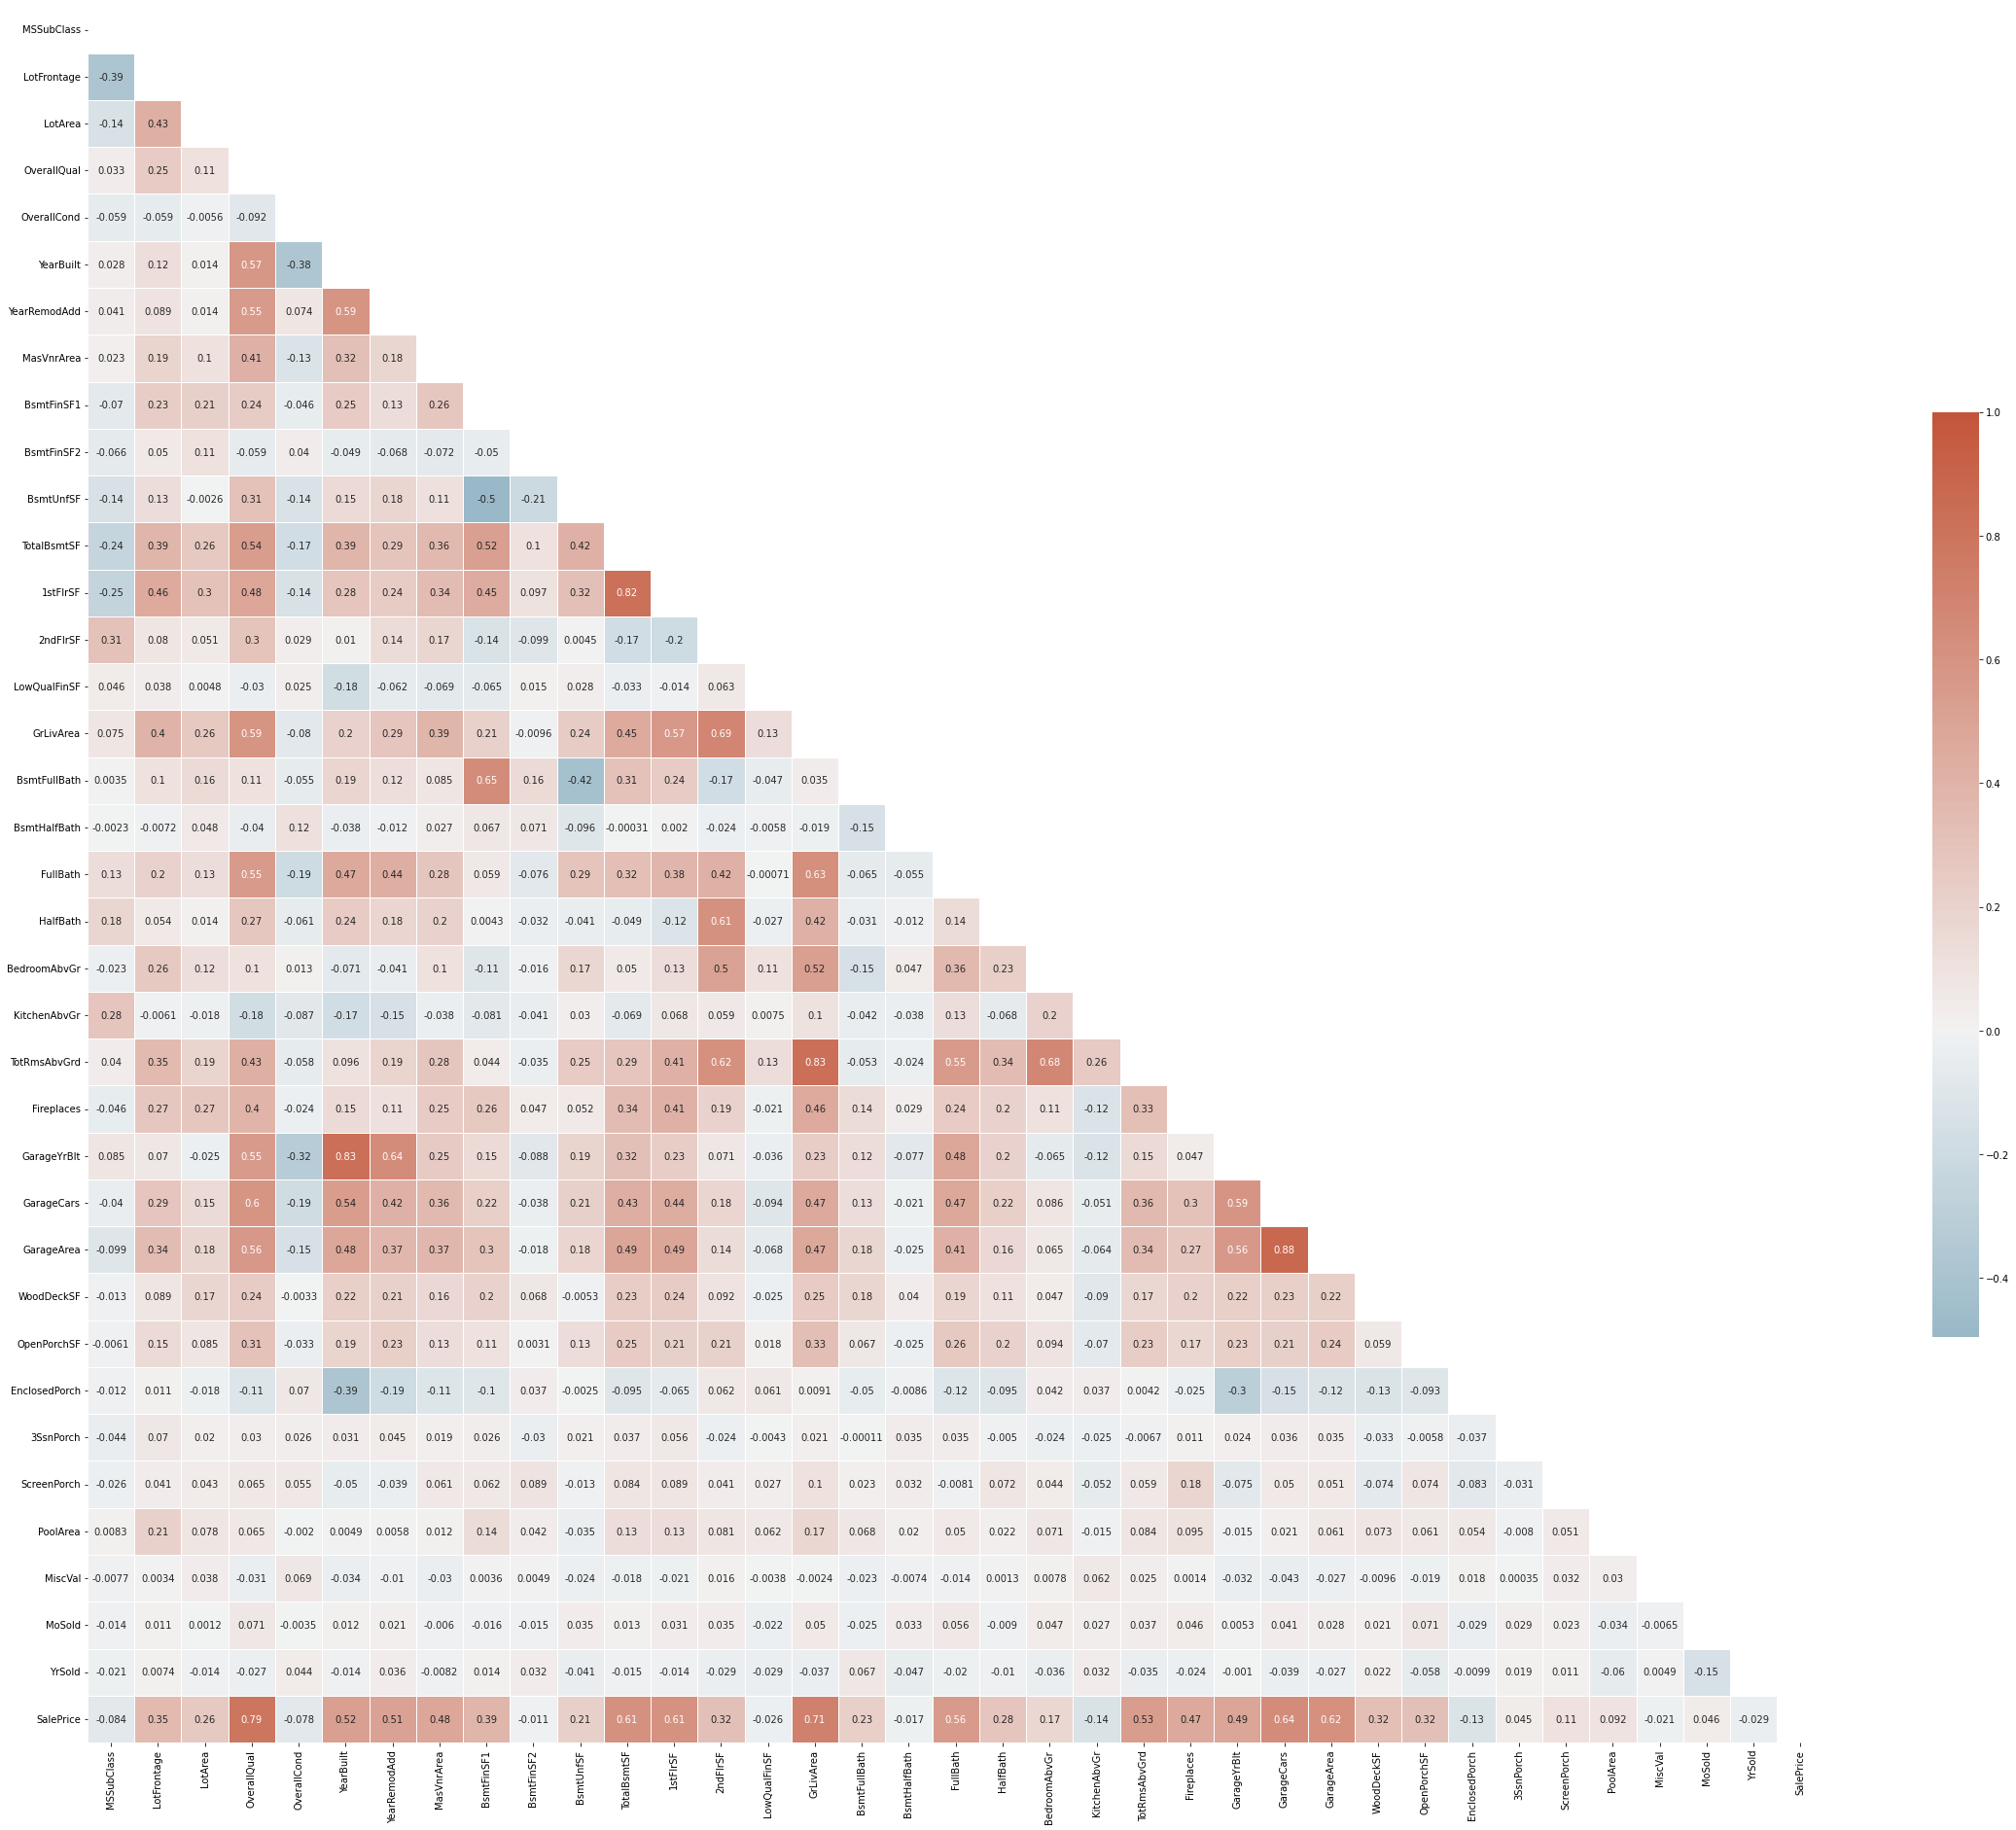

In [9]:
# Construct a correlation matrix

fig, ax = plt.subplots(figsize=(40, 35))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))       # Return upper triangle of an array.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# See which features correlates most with the target variable, they have the potentials to be investigated in depth
corr_rank = mat['SalePrice'].sort_values(ascending = False)
corr_rank

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'FullBath vs SalePrice')

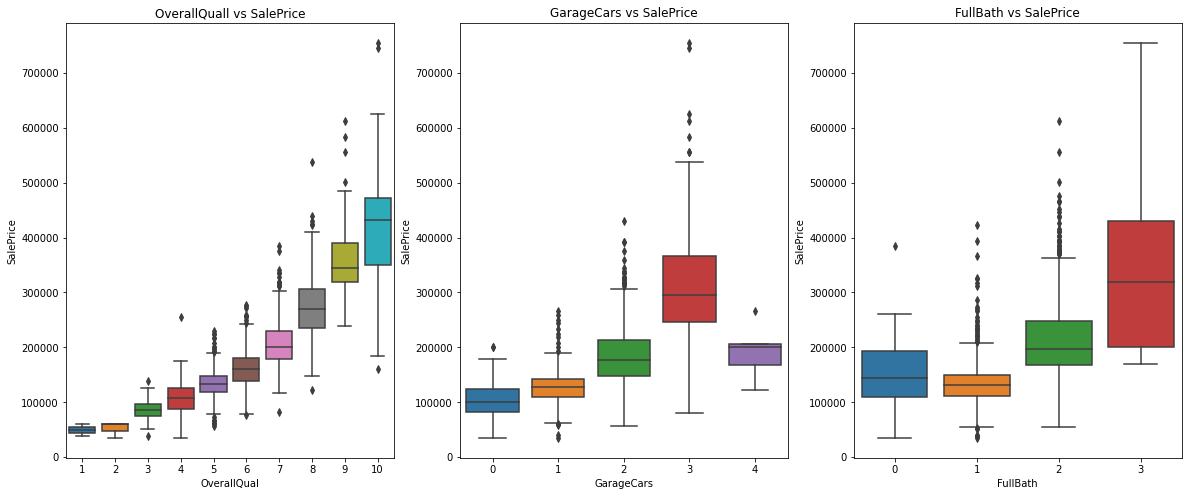

In [11]:
# Plot the relationship between OverallQuall and SalePrice [Pearson = 0.79] and
#                       between GarageCars and SalePrice [Pearson = 0.64] and
#                       between FullBath and SalePrice [Pearson = 0.56]
 
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.boxplot(data=train, x = corr_rank.index[1], y='SalePrice', ax = ax[0]).set_title('OverallQuall vs SalePrice', fontsize = 12)
sns.boxplot(data=train, x = corr_rank.index[3], y='SalePrice', ax = ax[1]).set_title('GarageCars vs SalePrice', fontsize = 12) # The second and the other variables are not plotted simply because the visualization is not good in this bar plot, but better in the below regression plot
sns.boxplot(data=train, x = corr_rank.index[7], y='SalePrice', ax = ax[2]).set_title('FullBath vs SalePrice', fontsize = 12)

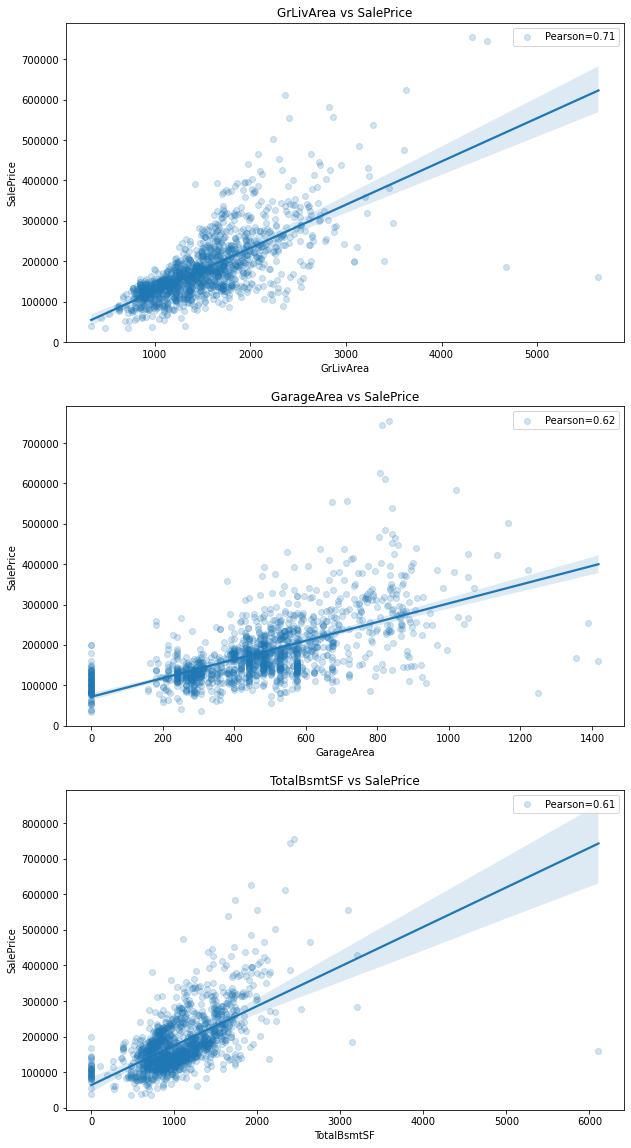

In [12]:
# Plot the relationship between GrLivArea and SalePrice [Pearson = 0.71]
# Plot the relationship between GarageArea and SalePrice [Pearson = 0.62]
# Plot the relationship between TotalBsmtSF and SalePrice [Pearson = 0.61]

figure, ax = plt.subplots(3,1, figsize = (10,20))
sns.regplot(data=train, x = corr_rank.index[2], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[0], label =f'Pearson={corr_rank[2]:.2f}').set_title('GrLivArea vs SalePrice', fontsize = 12)
sns.regplot(data=train, x = corr_rank.index[4], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[1], label =f'Pearson={corr_rank[4]:.2f}').set_title('GarageArea vs SalePrice', fontsize = 12)
sns.regplot(data=train, x = corr_rank.index[5], y='SalePrice', scatter_kws={'alpha':0.2}, ax = ax[2], label =f'Pearson={corr_rank[5]:.2f}').set_title('TotalBsmtSF vs SalePrice', fontsize = 12)

ax[0].legend(loc = 'best')
ax[1].legend(loc = 'best')
ax[2].legend(loc = 'best')

Text(0, 0.5, 'Median of Price in $')

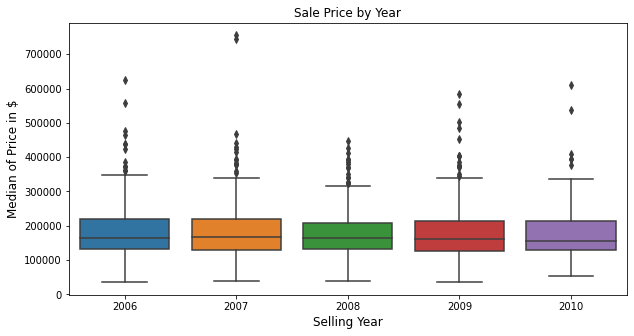

In [13]:
# Visulaize the SalePrice by Year (result shows that 95% of the SalePrice distribution are almost the same for each year)

plt.figure(figsize = (10,5))
sns.boxplot(x='YrSold', y="SalePrice", data = train)
plt.title('Sale Price by Year', fontsize = 12)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)

### Data processing

In [14]:
X = train.copy()
X.dropna(axis=0, subset=['SalePrice'], inplace=True) # Drop the row if SalePrice in train dataset is missing value

# Save the target variable as y
y = X.SalePrice

X_test = test.copy()

In [15]:
# Concatenating train & test set
train_test = pd.concat([X,X_test], axis=0, sort=False)

In [16]:
# See if there exists duplicated row
train_test.duplicated().sum()

0

In [17]:
# Drop the SalePrice row
train_test.drop('SalePrice', axis = 1, inplace = True)

In [18]:
# Get the number of missing data points per column
missing_values_count = train_test.isnull().sum()
missing_values_count

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [19]:
# Calculate how many total missing values in the dataset
total_cells = np.product(train_test.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing (about 6% missing data)
percent_missing = (total_missing/total_cells)
print(f'The missing values consist of {percent_missing:.3f}% of total data.')

The missing values consist of 0.061% of total data.


In [20]:
missing_cols = train_test[train_test.columns[missing_values_count>0]]
missing_cols.head(10)

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
6,RL,85.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,1993.0,Unf,2.0,480.0,TA,TA,NaN,MnPrv,Shed,WD
7,RL,75.0,NaN,AllPub,VinylSd,VinylSd,Stone,186.0,Ex,TA,...,2004.0,RFn,2.0,636.0,TA,TA,NaN,NaN,NaN,WD
8,RL,NaN,NaN,AllPub,HdBoard,HdBoard,Stone,240.0,Gd,TA,...,1973.0,RFn,2.0,484.0,TA,TA,NaN,NaN,Shed,WD
9,RM,51.0,NaN,AllPub,BrkFace,Wd Shng,None,0.0,TA,TA,...,1931.0,Unf,2.0,468.0,Fa,TA,NaN,NaN,NaN,WD


In [21]:
missing_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtCond      2837 non-null   object 
 10  BsmtExposure  2837 non-null   object 
 11  BsmtFinType1  2840 non-null   object 
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   object 
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

In [22]:
missing_cols.isna().sum().sort_values()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

Text(0, 0.5, '% of Missing Data')

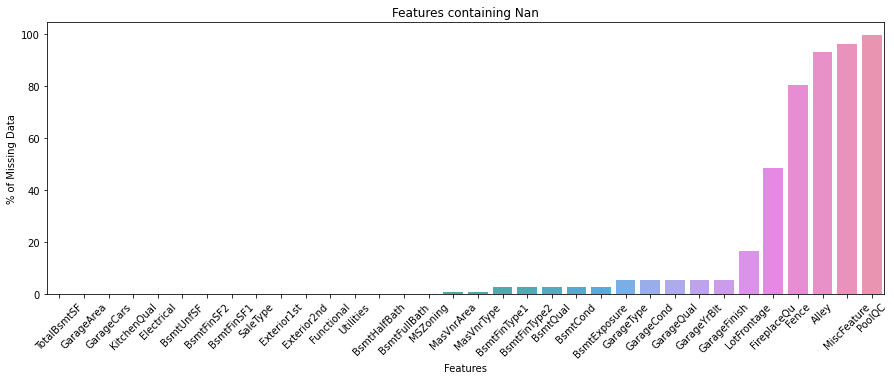

In [23]:
# Plot features that contain missing values
missing_cols_sum = missing_cols.isna().sum().sort_values()
plt.figure(figsize = (15,5))
sns.barplot(x = missing_cols_sum.index, y = missing_cols_sum/missing_cols.shape[0]*100)
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')


In [24]:
# Drop the columns if there are less than 80% valid data values
# Not consider to drop the row containing missing values because only 7 row contains the feature 'PoolQC', while the others don't
train_test.dropna(axis = 'columns', thresh = train.shape[0]*0.8)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [25]:
# Fill Categorical NaN by imputation (That we know how to fill due to the description file )
# These missing data are not missing, but reflect the absence of something
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_test[col] = train_test[col].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)

In [26]:
# Check the features with NaN remained out
train_test[train_test.columns[train_test.isna().sum()>0]].isna().sum().sort_values()

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
MSZoning          4
MasVnrArea       23
MasVnrType       24
GarageYrBlt     159
LotFrontage     486
dtype: int64

In [27]:
# Remove the useless variables
train_test = train_test.drop(['GarageYrBlt','YearRemodAdd'] , axis = 1)

In [28]:
# Impute the numerical missing values with KnnRegressor (other different Imputers can be used too)
for col in ('MSSubClass', 'YrSold', 'MoSold'):
    train_test[col] = train_test[col].apply(str)

from sklearn.neighbors import KNeighborsRegressor
def impute_knn(df, n_neighbors):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=n_neighbors)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col]) # Using the columns w/n nan to predict the columns w/ nan value, in a free-nan dataset
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

imputed_train_test = impute_knn(train_test, n_neighbors = 5)

In [29]:
# Check again the (categorical) features with NaN remained out
imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].isna().sum().sort_values()

Utilities      2
MSZoning       4
MasVnrType    24
dtype: int64

In [30]:
#  Check the type of data that these columns contain
imputed_train_test.columns[imputed_train_test.isna().sum()>0].dtype == 'object'

True

In [31]:
# Impute 'None' to these catogorical missing values 
imputed_train_test.update(imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].fillna('None'))

In [32]:
# Check again the features with NaN remained out (no missing value left this time!)
imputed_train_test[imputed_train_test.columns[imputed_train_test.isna().sum()>0]].isna().sum().sort_values()

Series([], dtype: float64)

In [33]:
imputed_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   MasVnrArea     2919 non-null   float64
 6   BsmtFinSF1     2919 non-null   float64
 7   BsmtFinSF2     2919 non-null   float64
 8   BsmtUnfSF      2919 non-null   float64
 9   TotalBsmtSF    2919 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2919 non-null   float64
 15  BsmtHalfBath   2919 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  BedroomA

### Feature Engineering

- Create some new features combining the ones that have already existed. These could help to increase the performance of the model

In [34]:
imputed_train_test['Total_Home_Quality'] = imputed_train_test['OverallQual'] + imputed_train_test['OverallCond']

imputed_train_test['Total_Bathrooms'] = (imputed_train_test['FullBath'] + (0.5 * imputed_train_test['HalfBath']) +
                               imputed_train_test['BsmtFullBath'] + (0.5 * imputed_train_test['BsmtHalfBath']))

imputed_train_test["HighQualSF"] = imputed_train_test["GrLivArea"]+imputed_train_test["1stFlrSF"] + imputed_train_test["2ndFlrSF"]+0.5*imputed_train_test["GarageArea"]+0.5*imputed_train_test["TotalBsmtSF"]+1*imputed_train_test["MasVnrArea"]

imputed_train_test["Age"] = pd.to_numeric(imputed_train_test["YrSold"])-pd.to_numeric(imputed_train_test["YearBuilt"])

In [35]:
# Creating dummy variables from categorical features
train_test_dummy = pd.get_dummies(imputed_train_test)

# Fetch all numeric features
# Extract all highly skewed (skew > 0.5) features
from scipy.stats import skew

#numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize highly skewed features using log_transformation, log(1+x)
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


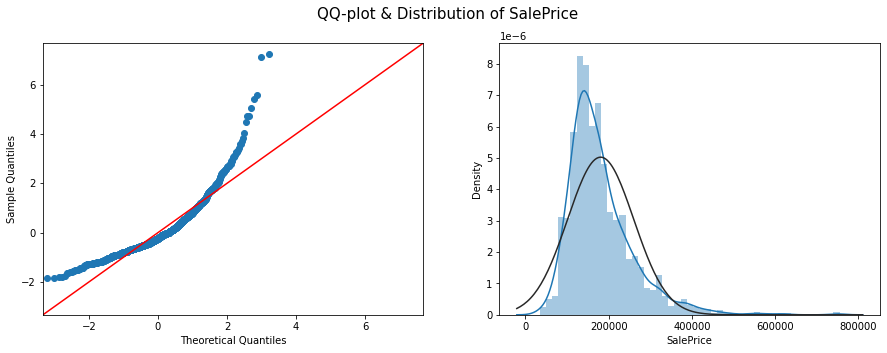

In [36]:
# Tranform the target distribution into a normal one with a log-transformation

# SalePrice before transformation
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution of SalePrice", fontsize= 15)

sm.qqplot(y, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0]) # QQ plot with the theoretic t-distribition

sns.distplot(y, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


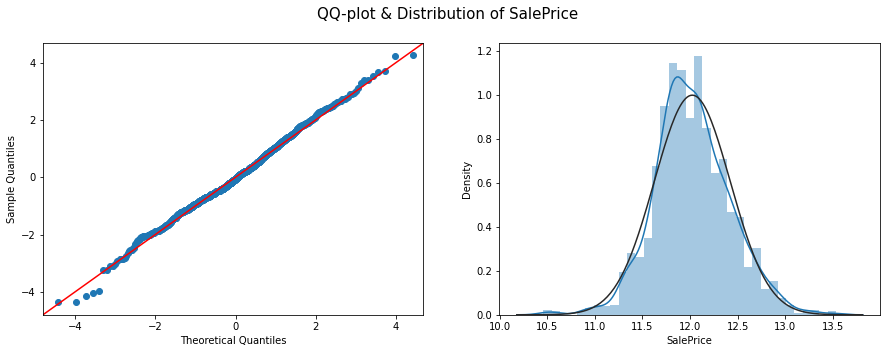

In [37]:
# SalePrice after transformation

y_log = np.log1p(y)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution of SalePrice", fontsize= 15)

sm.qqplot(y_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(y_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

### Build Model by PyCaret

- documentation: https://pycaret.readthedocs.io/en/latest/api/regression.html

In [38]:
import pycaret
from pycaret.utils import enable_colab
enable_colab()
print('PyCaret: %s' % pycaret.__version__)

Colab mode enabled.
PyCaret: 2.3.10


In [39]:
# print(train.shape)
# print(y_log.shape)
# print(test.shape)
print(train_test_dummy.shape)

(2919, 336)


In [40]:
new_train = train_test_dummy[0:1460]
new_test = train_test_dummy[1460:]

new_train = pd.concat([new_train, y_log], axis = 1)
print(new_train.shape)
print(new_test.shape)

(1460, 337)
(1459, 336)


In [41]:
# Set the dataset with the PyCaret library
from pycaret.regression import *

dataset = setup(data = new_train, target = 'SalePrice', train_size = 0.7, 
                remove_outliers= True, remove_multicollinearity = True, ignore_low_variance = True, 
                normalize = True, normalize_method = 'robust', use_gpu = True, silent = True)

# GPU is only enabled for CatBoost when data > 50,000 rows...

,Description,Value
0,session_id,5030
1,Target,SalePrice
2,Original Data,"(1460, 337)"
3,Missing Values,False
4,Numeric Features,332
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 159)"


In [ ]:
# Evaluate models and compare models
# This function will report a table of results summarizing all of the models that were evaluated and their performance
# It will also report the best-performing model and its configuration (CatBoost returns the best result)
best = compare_models(sort = 'RMSLE')

IntProgress(value=0, description='Processing: ', max=104)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:19
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0779,0.0129,0.1124,0.9037,0.0087,0.0065,18.6170
br,Bayesian Ridge,0.0797,0.0131,0.1131,0.9020,0.0088,0.0066,0.1890
ridge,Ridge Regression,0.0811,0.0137,0.1158,0.8978,0.0090,0.0068,0.0340
gbr,Gradient Boosting Regressor,0.0848,0.0146,0.1197,0.8915,0.0093,0.0071,1.3890
omp,Orthogonal Matching Pursuit,0.0914,0.0165,0.1274,0.8770,0.0098,0.0076,0.0400
et,Extra Trees Regressor,0.0948,0.0179,0.1329,0.8667,0.0102,0.0079,2.8440
rf,Random Forest Regressor,0.0943,0.0183,0.1342,0.8644,0.0104,0.0079,2.9310
knn,K Neighbors Regressor,0.1071,0.0231,0.1511,0.8304,0.0116,0.0089,1.2210
ada,AdaBoost Regressor,0.1246,0.0264,0.1619,0.8043,0.0125,0.0104,0.8810
dt,Decision Tree Regressor,0.1430,0.0410,0.2018,0.6933,0.0156,0.0119,0.0940


In [ ]:
# evaluate_model(best)

In [ ]:
# Create three models which return the best three result
catboost_model = create_model('catboost')
# lgbm_model = create_model('lightgbm')

In [ ]:
# br_model = create_model('br')

In [ ]:
# Perform hyperparameter tuning for best model
grid = {'iterations': [10,20,50,100,150,200],
        'learning_rate': [0.05,0.01,0.005,0.001],
        'depth': [2,3,4,5,6,7,8],
        'l2_leaf_reg': [2,3,5,9,13,17,23],
        # 'max_leaves' : [4,8,12,16,32,64],
        'model_size_reg' : [0.2,0.5,0.7,0.9]}

In [ ]:
import catboost
print(catboost.__version__)

In [ ]:
# CatBoost regressor documentation: https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
# Recommend to tune according to the CatBoost official: 
#   cat_features, one_hot_max_size, learnin_rate & iteration, 
#   depth, subsample, colsample_bylevel
#   colsample_bytree, colsample_bynode, l2_leaf_reg, random_strength
tuned_model1, tuned_model1_obj = tune_model(catboost_model, n_iter = 30, optimize = 'RMSLE', 
                        search_library='optuna', 
                        # custom_grid = grid, 
                        early_stopping_max_iters = 30, early_stopping = True, 
                        return_train_score = True, return_tuner = True, 
                        verbose = True, tuner_verbose = 1, choose_better = True)

In [ ]:
tuned_model1_obj

In [ ]:
# tuned_model2 = tune_model(gbr_model, n_iter = 50, optimize = 'RMSLE', search_library = 'optuna', return_train_score = True, early_stopping = True, choose_better = True)

In [ ]:
# tuned_model3 = tune_model(lightgbm_model, n_iter = 50, search_library = 'optuna', choose_better = False, return_train_score = True, early_stopping = True, choose_better = True)

In [ ]:
# Check the tuned hyperparameters
print(tuned_model1)
# print(tuned_model2)
# print(tuned_model3)

In [ ]:
# # interpret the tuned model (only support tree-based models)
# interpret_model(tuned_model) 

In [ ]:
# Plot the tuned models
plot_model(tuned_model1)

In [ ]:
# Plot the Prediction Error 
plot_model(tuned_model1, plot = 'error')
# plot_model(tuned_model2, plot = 'error')
# plot_model(tuned_model3, plot = 'error')

In [ ]:
# Plot the Feature Importance
# Draw insight of which data are used most to arrive at the final prediction

plot_model(tuned_model1,'feature')

In [ ]:
# # Draw insight from the effect of the features on the final predcition
# # Less important features are not seen here
# from catboost import Pool
# import shap

# train_pool = Pool(new_train)
# explainer = shap.TreeExplainer(tuned_model1) # insert model
# shap_values = explainer.shap_values(train_pool) # insert train Pool object
# shap.initjs()

# # The diagram represents each observation (x-axis) for the feature presented (y-axis)
# # The x location of each dot on the x-axis reflects the impact of that feature on the models' prediction, while color of dot represent the value of that feature for that exact observation
# shap.summary_plot(shap_values, new_train)

In [ ]:
# # Catboost comes with a great method: get_feature_importance
# # that can be used to find important interactions among features, for feature engineering
# # Huge Advantage because it can give us insights about possible new features to create that can improve the performance
# interaction = tuned_model1.get_feature_importance(train_pool, type="Interaction")
# column_names = new_train.columns.values 
# interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
# interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
# interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
# interaction.head(20)

In [ ]:
# # Create a blend model
# blender = blend_models(estimator_list = [tuned_model1, tuned_model2, tuned_model3], return_train_score = True)

In [ ]:
# # Create a stack model
# stacker = stack_models(estimator_list = [tuned_model1, tuned_model2, tuned_model3], return_train_score = True)

In [ ]:
# Return the best model (can be determined by 'R2' or 'MAE' or 'RMSE', ...)
best_RMSLE_model = automl(optimize = 'RMSLE')
best_RMSLE_model

In [ ]:
# Select the model with best RMSLE as the best model
best_model = tuned_model1
best_model

In [ ]:
# Predict for the testing dataset
predictions = predict_model(best_model, data = new_test)
predictions.head()

In [ ]:
# Finalize the model 
final_model = finalize_model(best_model)

In [ ]:
# Save the model
save_model(final_model, 'Final Catboost Model 23Jun2022')

# #　Load a saved model
# saved_final_lightgbm = load_model('Final Model (LGBM) 16Jun2022')


In [ ]:
# Generating CSV file for Kaggle Submissions 
submission = pd.DataFrame({
        "Id": predictions.index,
        "SalePrice": np.expm1(predictions['Label'])
    })

submission.to_csv('HousePrice_catboost_model_submission.csv', index=False)